1. https://github.com/vjrahil/Face-Generator/blob/master/dlnd_face_generation.ipynb - code initial
2. https://www.kaggle.com/code/nageshsingh/generate-realistic-human-face-using-gan - dataset
3. https://www.theaidream.com/post/generate-realistic-human-face-using-gan-1 - reference
4. https://github.com/NVlabs/stylegan - styleGAN reference link
5.

In [11]:
import os
import glob
import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil

In [14]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets
from torchvision import transforms

### Checks if Data is already extracted: if not, then execute extraction else skip

In [12]:

MYDIR = ("Data/celeb_A_extract")
CHECK_FOLDER = os.path.isdir(MYDIR)

if not CHECK_FOLDER:
    shutil.unpack_archive('Data/processed-celeba-small.zip', 'Data/celeb_A_extract')
    print("Extraction completed...")
else:
    print(MYDIR,"folder already exists")

Data/celeb_A_extract folder already exists


In [19]:
def get_dataloader(batch_size, image_size, data_dir='Data/celeb_A_extract/processed_celeba_small/celeba'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    transform = transforms.Compose([transforms.Resize(image_size),transforms.CenterCrop(image_size),transforms.ToTensor()])
    # TODO: Implement function and return a dataloader
    dataset = datasets.ImageFolder(data_dir,transform = transform)

    dataloader = torch.utils.data.DataLoader(dataset = dataset,batch_size = batch_size,shuffle = True)
    return dataloader

In [20]:
# Define function hyperparameters
batch_size = 256
img_size = 32

# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)

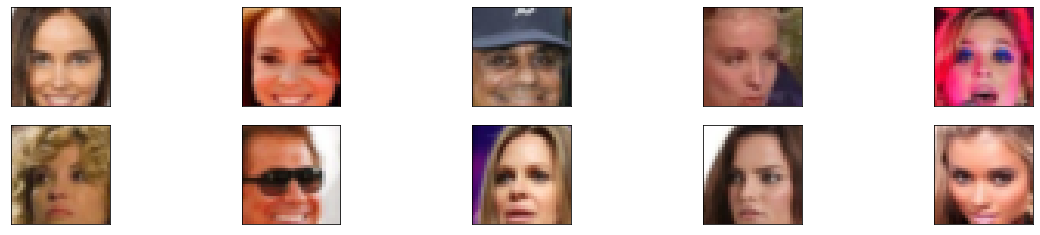

In [27]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=10
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])